In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
reload(h_env)

C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\RLenv.venv\lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\RLenv.venv\lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from 'C:\\Users\\pi030\\Documents\\Uni\\ReinforcementLearning\\finalProject\\RLenv.venv\\lib\\site-packages\\hockey\\hockey_env.py'>

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [5]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [7]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': -0.08218065468789819,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [8]:
env.close()

# Train Shooting

In [9]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

AttributeError: type object 'HockeyEnv' has no attribute 'TRAIN_SHOOTING'

In [10]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

error: display Surface quit

In [11]:
env.close()

# Train DEFENDING

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)

In [ ]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Using discrete actions

In [ ]:
import random

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [ ]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Hand-crafted Opponent

In [4]:
env = h_env.HockeyEnv()

In [5]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [6]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
np.std(obs_buffer,axis=0)

If you want to use a fixed observation scaling, this might be a reasonable choice

In [ ]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [ ]:
import pylab as plt

In [ ]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

In [ ]:
plt.plot(obs_buffer[:,12])

In [ ]:
plt.plot(reward_buffer[:])

In [ ]:
np.sum(reward_buffer)

In [ ]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

In [12]:
env.close()

# Human Opponent

In [13]:
env = h_env.HockeyEnv()

In [56]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [57]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: 
        winner = info['winner']
        if winner == 0:
            print("Draw")
        elif winner == 1:
            print("Player 1 won")
        else:
            print("Player 2 won")
        break

Player 1 won


In [67]:
env.close()

# Test trained agent

In [4]:
import sys
# add path to Hockey_training
sys.path.append("C:/Users/pi030/Documents/Uni/ReinforcementLearning/finalProject/code/RL_Project/Hockey_training")
import training

In [5]:
env = h_env.HockeyEnv()

In [13]:
o, info = env.reset()
#_ = env.render()

# let two (trained) opponents play against each other
player1 = training.TD3Opponent()
player2 = h_env.BasicOpponent(weak=False)
num_games = 100
repetitions = 5 #50

TD3 agent: ../agents/participating_in_competition/TD3_pure_final.pth


In [14]:
win_rates_player_1 = []
win_rates_player_2 = []
draw_rates = []

for rep in range(repetitions):
    
    obs_buffer = []
    reward_buffer = []
    obs2_buffer = []
    winner_buffer = []
    reward2_buffer = []
    playtime_buffer = []
    
    goals_player_1 = 0
    goals_player_2 = 0
    draws = 0

    for game in range(num_games):
        obs, info = env.reset()
        obs_agent2 = env.obs_agent_two()
        
        for _ in range(500):  # only 250 steps possible because of hockeyEnv
            # env.render()
            a1 = player1.act(obs)
            a2 = player2.act(obs_agent2) 
            obs, r, d, t, info = env.step(np.hstack([a1,a2]))
            info2 = env.get_info_agent_two()
            r2 = env.get_reward_agent_two(info2)
            obs_buffer.append(obs)
            obs_agent2 = env.obs_agent_two()
            obs2_buffer.append(obs_agent2)
            reward_buffer.append(r)
            reward2_buffer.append(r2)
            if d or t:
                winner = info["winner"]
                winner_buffer.append(winner)
                if winner == 1:
                    goals_player_1 += 1
                elif winner == -1:
                    goals_player_2 += 1
                else:
                    draws += 1
                playtime_buffer.append(_+1)
                #print(f"length of game: {_+1} \t winner: {winner}")
                break
    
    win_rate_1 = goals_player_1 / num_games
    win_rate_2 = goals_player_2 / num_games
    draw_rate = draws / num_games
    win_rates_player_1.append(win_rate_1)
    win_rates_player_2.append(win_rate_2)
    draw_rates.append(draw_rate)
    if rep % 5 == 0:
        print("------------------------------------------")
        print(f"{rep} out of {repetitions} repetitions done...")
        print(f"Over the last {num_games} games:")
        print("Player 1 won: ", goals_player_1)
        print("Player 2 won: ", goals_player_2)
        print("Draws: ", draws)
        print("Win rate of player 1:", win_rate_1)
        print("Win rate of player 2:", win_rate_2)
        print("Draw rate:", draw_rate)

print("all repetitions done...")

obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)
playtime_buffer = np.asarray(playtime_buffer)

------------------------------------------
0 out of 5 repetitions done...
Over the last 100 games:
Player 1 won:  93
Player 2 won:  5
Draws:  2
Win rate of player 1: 0.93
Win rate of player 2: 0.05
Draw rate: 0.02
all repetitions done...


In [15]:
print(win_rates_player_1)

[0.93, 0.98, 0.96, 0.94, 0.94]


In [16]:
avg_win_rate = np.mean(win_rates_player_1)
print("avg win rate p1:", avg_win_rate)
sd_win_rate = np.std(win_rates_player_1)
print("std win rate p1:", sd_win_rate)
print("avg draw rate:", np.mean(draw_rates))
print("std draw rate:", np.std(draw_rates))

avg win rate p1: 0.95
std win rate p1: 0.01788854381999831
avg draw rate: 0.026000000000000002
std draw rate: 0.013564659966250536


In [ ]:
# below: analyse play time, create plots of a specific game

In [17]:
obs_buffer.shape

(6828, 18)

In [40]:
np.mean(obs_buffer,axis=0)

array([-2.86483273, -0.28315396,  0.00019615,  0.00925588, -0.17099387,
        0.01754052,  1.29496305, -0.20457886,  0.48678468, -0.67186675,
       -0.0771503 ,  0.11200598, -0.28994686, -0.38963044, -0.39762956,
        0.09076837,  0.96537145,  1.37138447])

In [41]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([-0.18446013, -0.4432945 , -0.00762928, -0.04084459,  0.03908525,
       -0.9793615 ,  0.15573351,  0.30714071,  0.00757151,  0.03924177,
       -0.04067505,  0.49478658,  0.        ,  0.        ,  0.        ,
        0.        , -0.11623141,  0.10412842])

In [42]:
np.mean(winner_buffer,axis=0)

np.float64(-0.25)

In [12]:
np.std(winner_buffer,axis=0)

np.float64(0.8046738469715542)

In [13]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(np.float64(-168.15772014332785), np.float64(64.22687026034666))

In [14]:
np.mean(playtime_buffer)

np.float64(111.35)

## Analyze game data

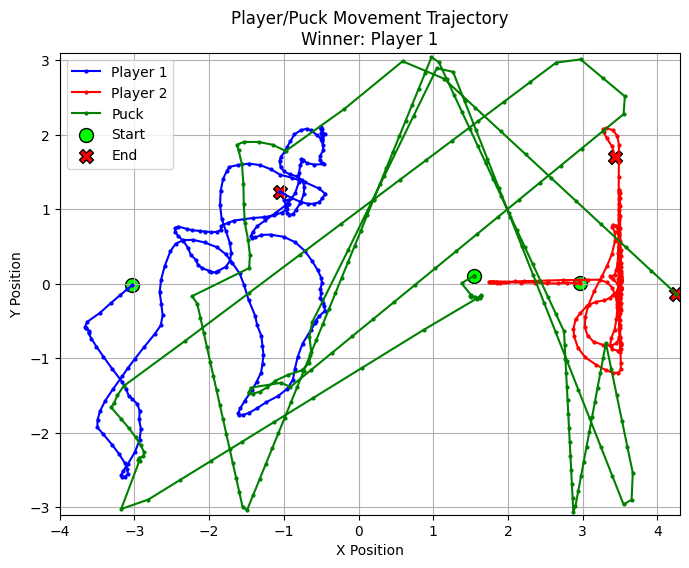

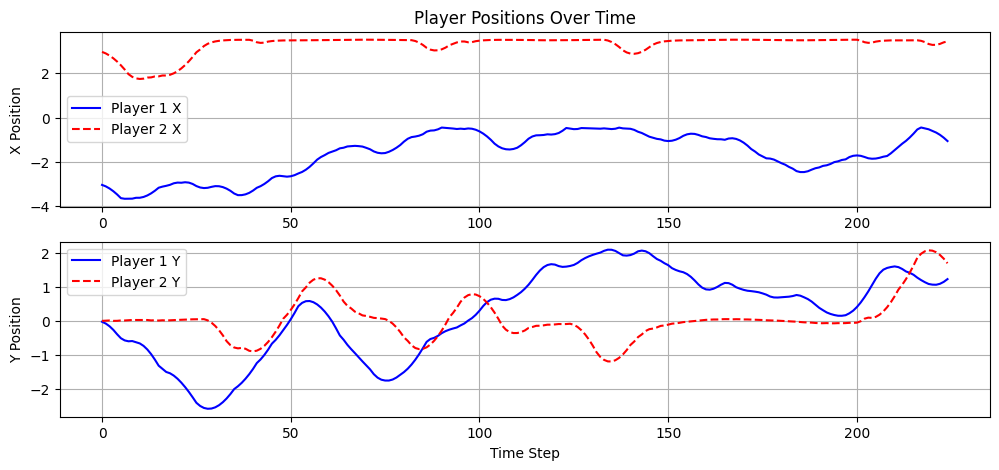

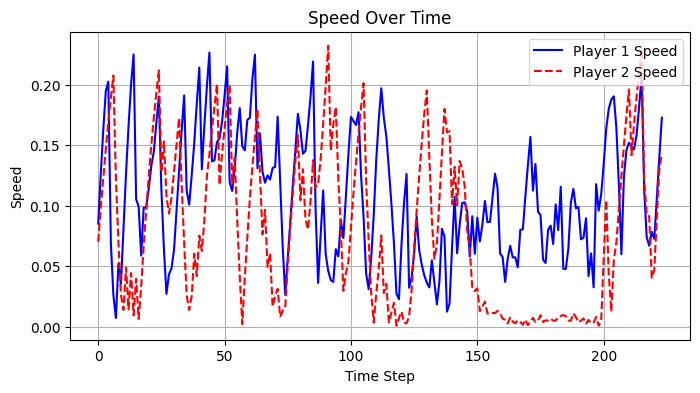

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt
import matplotlib.pyplot as plt

# analyze data of one specific game (start with index/ game 1)
game_number = 1

winner = winner_buffer[game_number-1]
if winner == -1:
    winner = 2

# take observations of only that game
start_idx = sum(playtime_buffer[:game_number - 1])  # Start index (sum of previous games' steps)
end_idx = start_idx + playtime_buffer[game_number - 1]  # End index
observations = obs_buffer[start_idx:end_idx]  # Slice obs_buffer

# Extract player 1 positions
x_player1 = observations[:, 0]  # X position of player 1
y_player1 = observations[:, 1]  # Y position of player 1

# Extract player 2 positions
x_player2 = observations[:, 6]  # X position of player 2
y_player2 = observations[:, 7]  # Y position of player 2

# Extract puck data
puck_x = observations[:, 12]
puck_y = observations[:, 13]
puck_time_p1 = observations[:, 16]
puck_time_p2 = observations[:, 17]

# Compute speed for both players
dx1 = np.diff(x_player1)
dy1 = np.diff(y_player1)
speed_player1 = np.sqrt(dx1**2 + dy1**2)

dx2 = np.diff(x_player2)
dy2 = np.diff(y_player2)
speed_player2 = np.sqrt(dx2**2 + dy2**2)

# Compute speed puck
dx3 = np.diff(puck_x)
dy3 = np.diff(puck_y)
speed_puck = np.sqrt(dx3**2 + dy3**2)

# Create time axis
time_steps = np.arange(len(x_player1))  # Time steps for plotting

plt.close()
# ---- PLOT: Player & Puck Movement Trajectory ----
plt.figure(figsize=(8, 6))

# Plot movement paths
plt.plot(x_player1, y_player1, label="Player 1", color='blue', marker='o', markersize=2 , linestyle='-')
plt.plot(x_player2, y_player2, label="Player 2", color='red', marker='o', markersize=2, linestyle='-')
plt.plot(puck_x, puck_y, label="Puck", color='green', marker='o', markersize=2, linestyle='-')

# Highlight start positions (Green)
plt.scatter(x_player1[0], y_player1[0], color='lime', edgecolors='black', s=100, label="Start", marker='o')
plt.scatter(x_player2[0], y_player2[0], color='lime', edgecolors='black', s=100, marker='o')
plt.scatter(puck_x[0], puck_y[0], color='lime', edgecolors='black', s=100, marker='o')

# Highlight end positions (Red)
plt.scatter(x_player1[-1], y_player1[-1], color='red', edgecolors='black', s=100, label="End", marker='X')
plt.scatter(x_player2[-1], y_player2[-1], color='red', edgecolors='black', s=100, marker='X')
plt.scatter(puck_x[-1], puck_y[-1], color='red', edgecolors='black', s=100, marker='X')

# Labels & Formatting
plt.xlim(-4., 4.3) 
plt.ylim(-3.1, 3.1)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title(f"Player/Puck Movement Trajectory\nWinner: {'No Winner (Draw)' if winner == 0 else f'Player {winner}'}")
plt.legend()
plt.grid(True)
plt.show()

# ---- PLOT 2: X & Y Positions over time ----
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(time_steps, x_player1, label="Player 1 X", color='blue')
plt.plot(time_steps, x_player2, label="Player 2 X", color='red', linestyle='dashed')
plt.ylabel("X Position")
plt.title("Player Positions Over Time")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_steps, y_player1, label="Player 1 Y", color='blue')
plt.plot(time_steps, y_player2, label="Player 2 Y", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.show()

# ---- PLOT 3: Speed over time ----
plt.figure(figsize=(8, 4))
plt.plot(time_steps[:-1], speed_player1, label="Player 1 Speed", color='blue')
plt.plot(time_steps[:-1], speed_player2, label="Player 2 Speed", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Speed")
plt.title("Speed Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
env.close()